In [1]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/learning_resources.csv')
display(df.head(2))
tags = pd.read_csv('../data/tags.csv')
display(tags.head(2))
df['tags'] = df['id'].apply(lambda x: (' '.join(tags[tags['id'] == x]['concept_tag'].values.tolist())).strip())
print(df.columns)
print(df.count())
df.head(2)

,id,title,subtitle,description,short_description,syllabus,url,slug,difficulty,created,...,available,end_date,typical_learning_time,rating,price,new,language,format,license,venue
0,cs101,Intro to Computer Science,Build a Search Engine & a Social Network,In this introduction to computer programming c...,Learn key computer science concepts in this in...,###Lesson 1: How to Get Started\n\n- Interview...,https://www.udacity.com/course/intro-to-comput...,intro-to-computer-science--cs101,beginner,NaN,...,NaN,NaN,3months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity
1,ud257,A/B Testing,Online Experiment Design and Analysis,This course will cover the design and analysis...,This course will cover the design and analysis...,### Lesson 1: Overview of A/B Testing\nThis le...,https://www.udacity.com/course/ab-testing--ud2...,ab-testing--ud257,intermediate,NaN,...,NaN,NaN,1months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity


,id,shortname,concept_tag,url
0,ud257,ab-testing--ud257,video_lecture,https://www.udacity.com/course/ab-testing--ud2...
1,ud257,ab-testing--ud257,in_depth,https://www.udacity.com/course/ab-testing--ud2...


Index([u'id', u'title', u'subtitle', u'description', u'short_description',
       u'syllabus', u'url', u'slug', u'difficulty', u'created',
       u'date_modified', u'date_published', u'available', u'end_date',
       u'typical_learning_time', u'rating', u'price', u'new', u'language',
       u'format', u'license', u'venue', u'tags'],
      dtype='object')
id                       458
title                    457
subtitle                 117
description              390
short_description         17
syllabus                  46
url                      458
slug                     458
difficulty               111
created                  206
date_modified              0
date_published           206
available                206
end_date                   0
typical_learning_time    202
rating                    81
price                    452
new                        0
language                 458
format                   458
license                  357
venue                    458
tags 

,id,title,subtitle,description,short_description,syllabus,url,slug,difficulty,created,...,end_date,typical_learning_time,rating,price,new,language,format,license,venue,tags
0,cs101,Intro to Computer Science,Build a Search Engine & a Social Network,In this introduction to computer programming c...,Learn key computer science concepts in this in...,###Lesson 1: How to Get Started\n\n- Interview...,https://www.udacity.com/course/intro-to-comput...,intro-to-computer-science--cs101,beginner,NaN,...,NaN,3months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture project overview computer_scienc...
1,ud257,A/B Testing,Online Experiment Design and Analysis,This course will cover the design and analysis...,This course will cover the design and analysis...,### Lesson 1: Overview of A/B Testing\nThis le...,https://www.udacity.com/course/ab-testing--ud2...,ab-testing--ud257,intermediate,NaN,...,NaN,1months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture in_depth project data_collection...


In [3]:
df = df[df['tags'].apply(len) > 0]
tags_vec = CountVectorizer(min_df=0., max_df=.3).fit_transform(df['tags']).todense()
df['title'] = df['title'].apply(text_cleanup)
tsne_df = tsne_plot(tags_vec, df[['title']]) #, 'venue']])

356


150


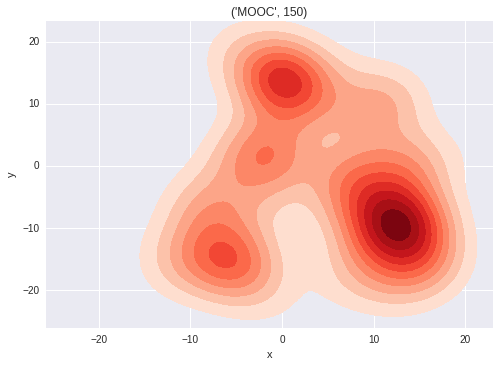

149


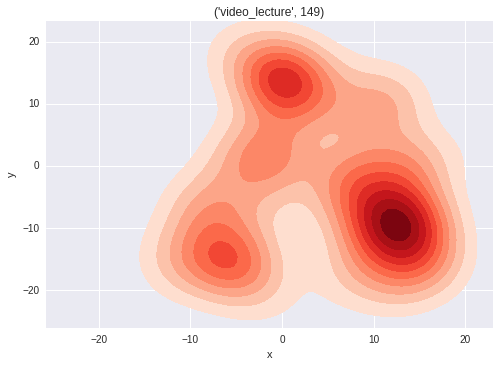

132


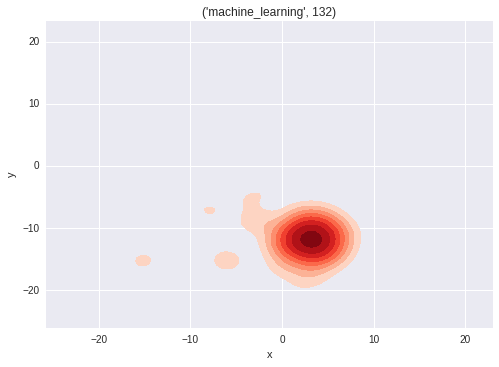

85


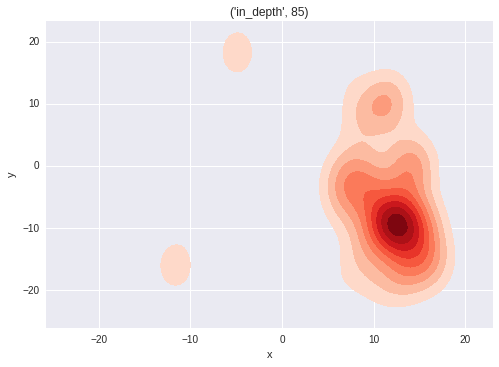

54


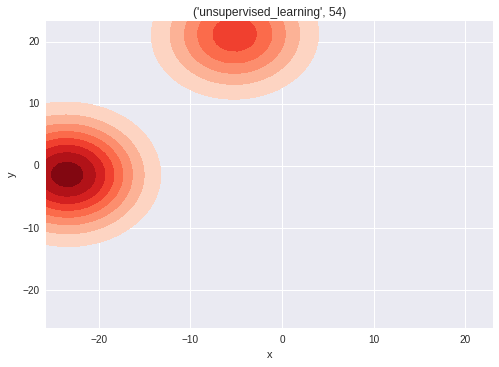

53


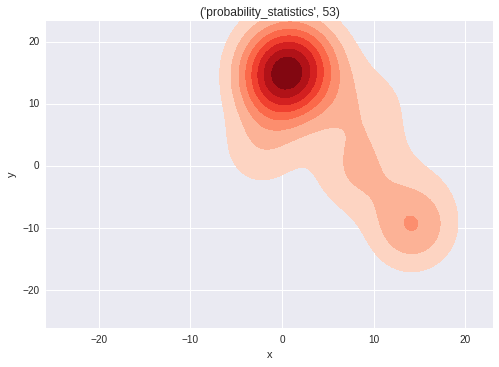

49


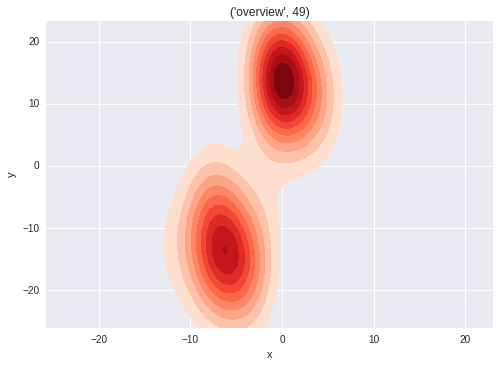

45


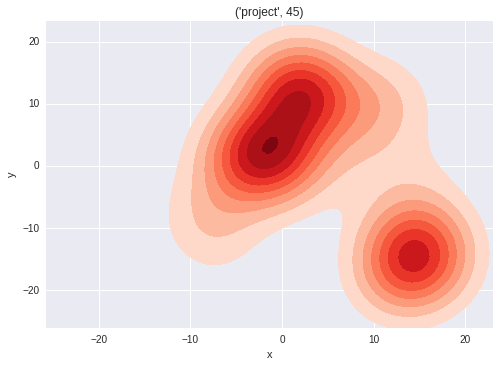

40


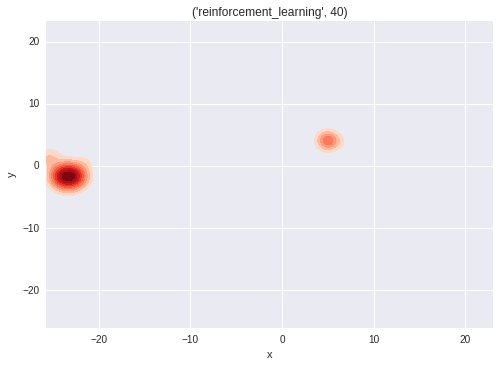

34


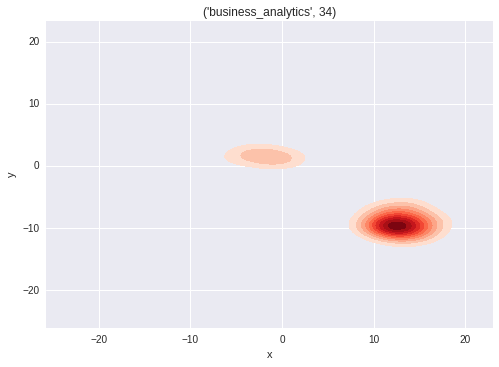

32


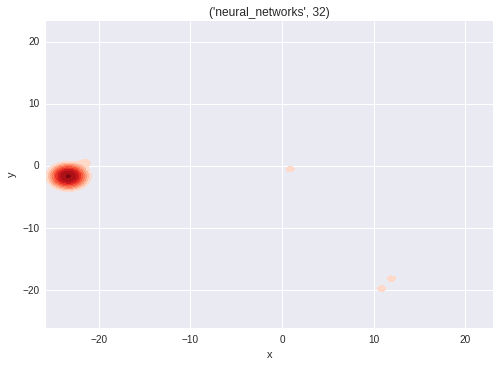

25


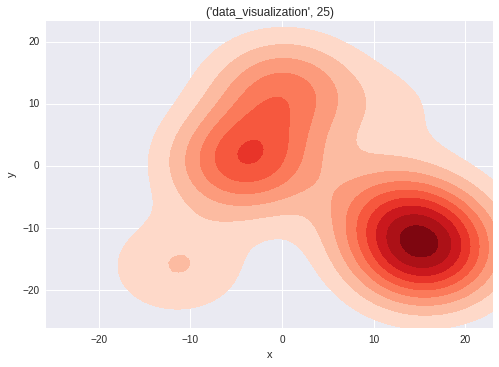

21


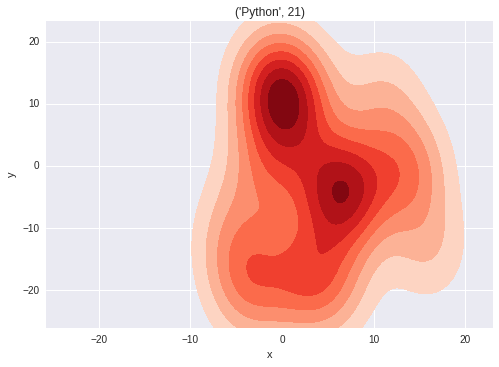

21


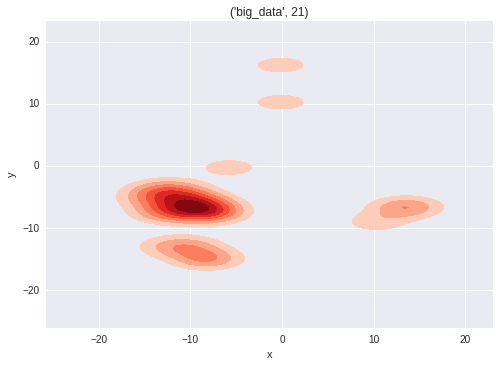

16


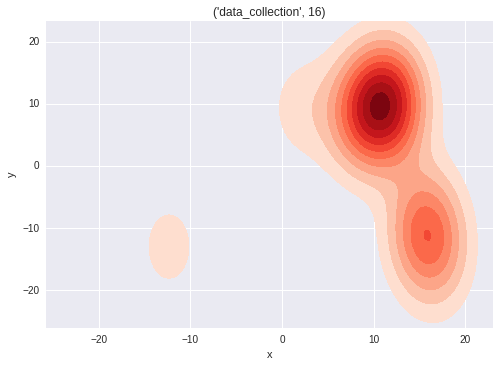

15


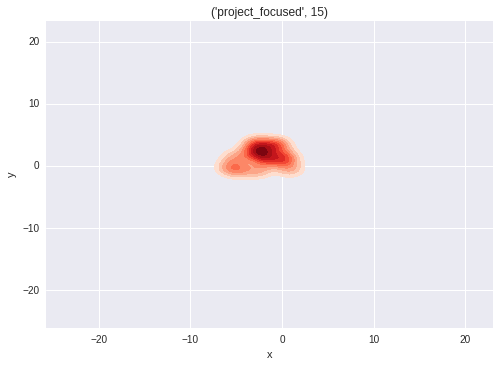

15


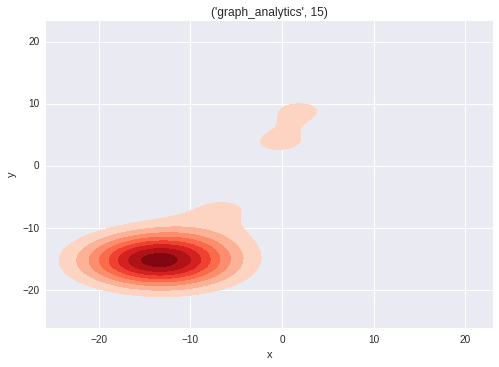

14


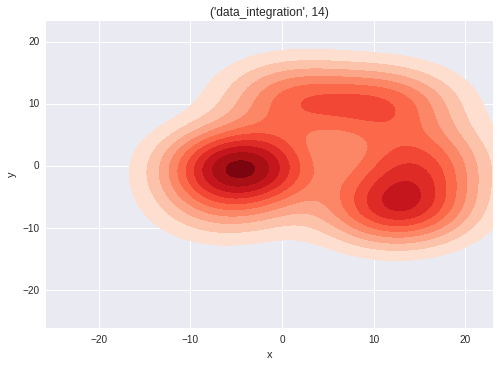

14


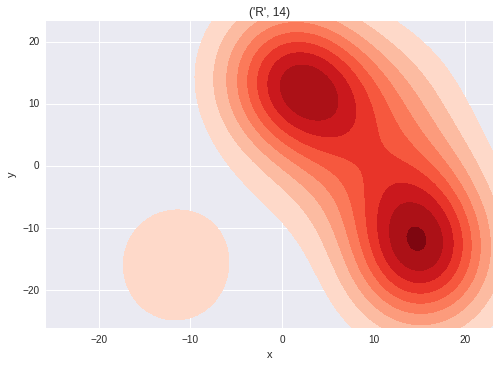

13


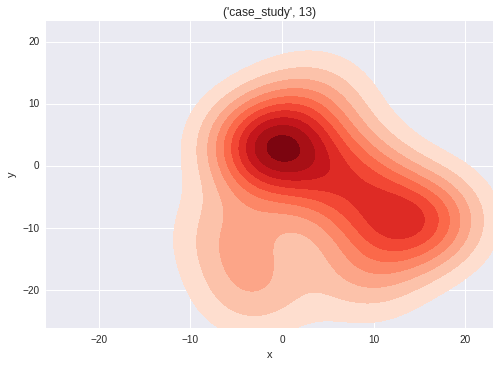

12


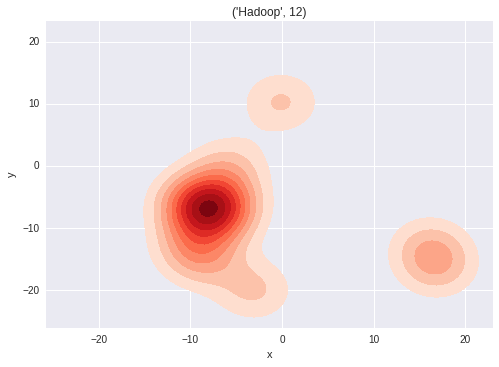

11


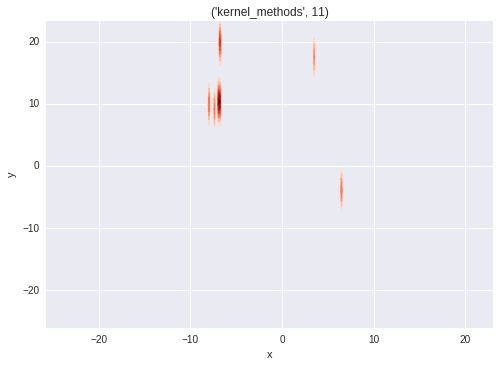

10


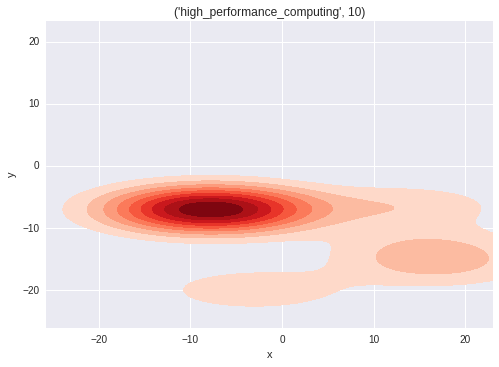

10


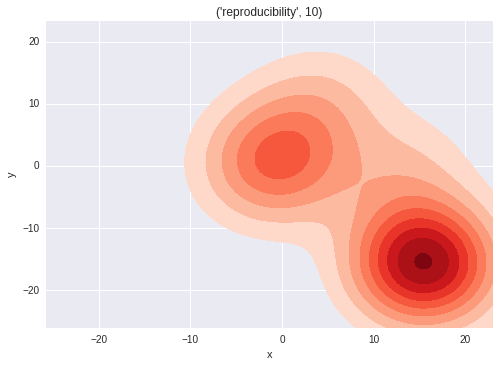

10


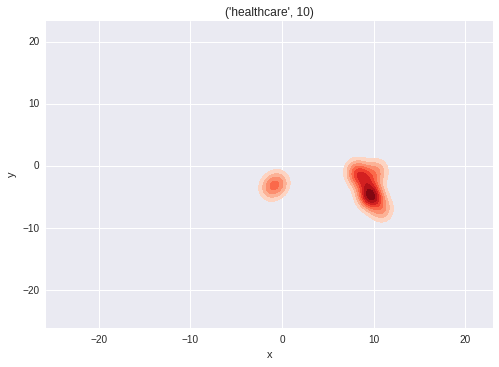

10


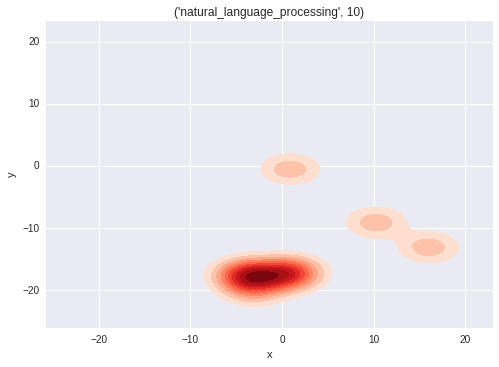

9


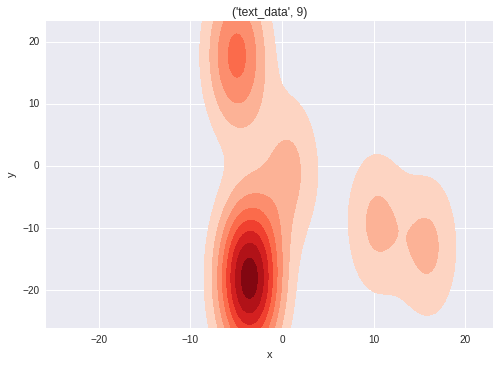

9


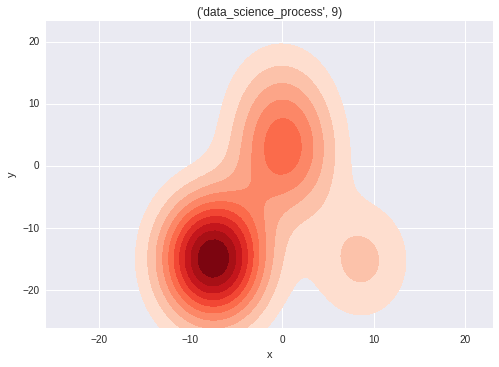

8


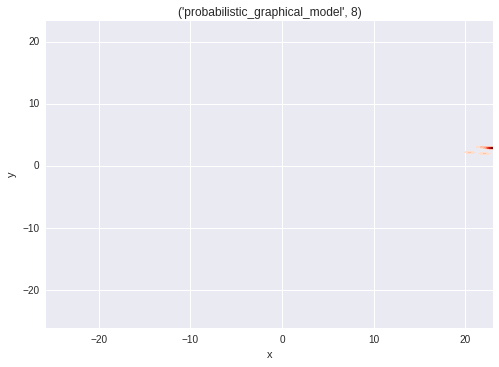

8


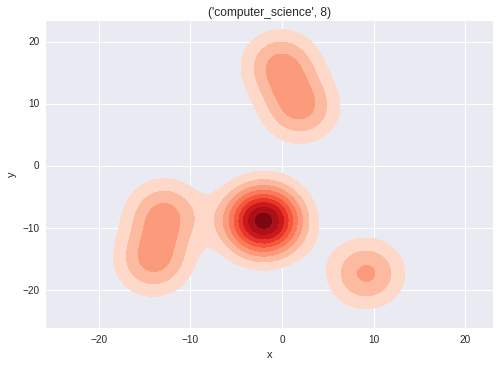

In [7]:
x_lim = [tsne_df['x'].min(), tsne_df['x'].max()]
y_lim = [tsne_df['y'].min(), tsne_df['y'].max()]
sorted_tags = sorted(Counter([j for i in df['tags'].values for j in i.split() if j != '']).items(), key=itemgetter(1), reverse=True)
for i in sorted_tags[:30]:
    t, occ = i
    t_df = tsne_df[df['tags'].apply(lambda x: t in x.split())]
    print(len(t_df))
    ax = sns.kdeplot(t_df['x'], t_df['y'],
                 cmap="Reds", shade=True, shade_lowest=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    plt.title(i)
    plt.show()